In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
plt.style.use('ggplot')

In [5]:
%matplotlib inline

<h3><center>Define Loss Function</center></h3>

$$L(A(i), Y)=\left\{\begin{matrix}BY^2 \ \ i=0\\ \frac{C}{10} \ \ \ \ \ i=1\end{matrix}\right.$$

In [15]:
def loss(b,y,c):
    l1 = b*y**2
    l2 = c/10
    return l1, l2

<h3><center>Define Goal Function</center></h3>

$$G(A(i), \vartheta )=\left\{\begin{matrix}E[BY^2] \ \ i=0\\ E\left [ \frac{C}{10} \right ] \ \ \ \ \ i=1\end{matrix}\right.$$

### expected value

$$E[X] = n\theta \ \ (1)$$

### variance

$$Var[X] = n\theta(1-\theta) \ \ (2)$$

### using the property

$$Var[X] = E[X^2] - E[X]^2 \ \ (3)$$

### we arrive at

$$E[X^2] = n^2\theta^2 + n\theta(1-\theta)$$

### First Case

$$E[BY^2] \overset{E[aX]=aE[X]}{\rightarrow} BE[Y^2] \overset{E[X^2] = n^2\theta^2 + n\theta(1-\theta)}{\rightarrow} BE[Y^2]=B[n^2\theta^2 + n\theta(1-\theta)]$$

### Factory 

$$E\left [ \frac{C}{10} \right ] = \frac{C}{10}E[1]\overset{E[1]=1}{\rightarrow}E\left [ \frac{C}{10} \right ]= \frac{C}{10}$$

In [27]:
def goal(b, n, theta, c):
    g1 = b*(((n**2)*(theta**2)) + (n*theta*(1-theta)))
    g2 = c/10
    return g1, g2

<h3><center>Define Risk Function</center></h3>

$$R(A(i))=\left\{\begin{matrix}
E^\pi[G(A(0)]  \ \ \mathbf{i=0} 
\\ 
E^\pi[G(A(1)] \ \ \ \mathbf{i=1} 
\end{matrix}\right.$$

### We arrive at

$$R(A(i))=\left\{\begin{matrix}
B[N^2[(\frac{r}{t})^2 + \frac{r(t-r)}{t^2(t+1)}]+N(\frac{r}{t})-N[(\frac{r}{t})^2 + \frac{r(t-r)}{t^2(t+1)}]]  \ \mathbf{i=0} 
\\ 
\frac{C}{10} \ \ \ \mathbf{i=1} 
\end{matrix}\right.$$

In [28]:
def risk(r,b=10000,n=365,t=365,c=100):
    a1 = ((r/t)**2)+((r*(t-r))/((t**2)*(t+1))) 
    a2 = n*(r/t)
    r1 = b*(((n**2)*a1)+a2-(n*a1))
    r2 = c/10.
    return round(r1,0), r2

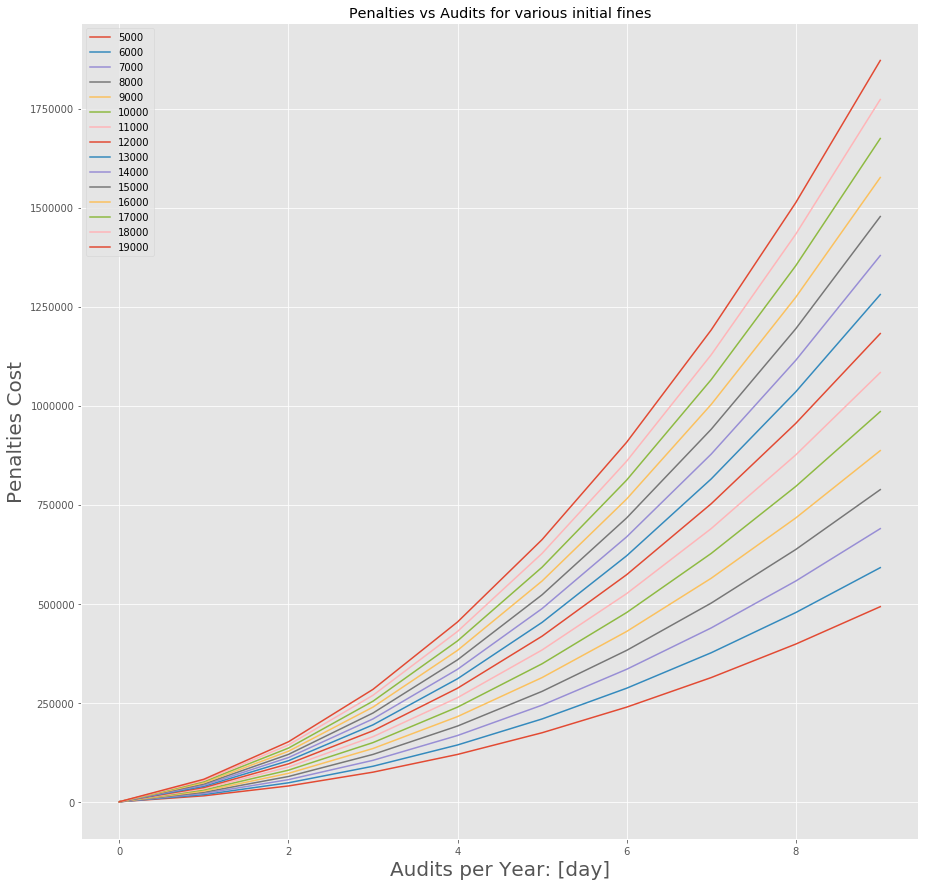

In [18]:
audits = np.arange(0,10,1)
penalties = np.zeros(audits.shape[0])

fig, ax = plt.subplots(figsize=(15, 15))

for fine in np.arange(5000,20000,1000):
    for i, a in enumerate(audits):
        penalties[i] = risk(a,b=fine)[0]
    plt.plot(audits, penalties, label=str(fine))
plt.ylabel('Penalties Cost', fontsize=20)
plt.xlabel('Audits per Year: [day]', fontsize=20)
plt.title('Penalties vs Audits for various initial fines')
plt.legend()

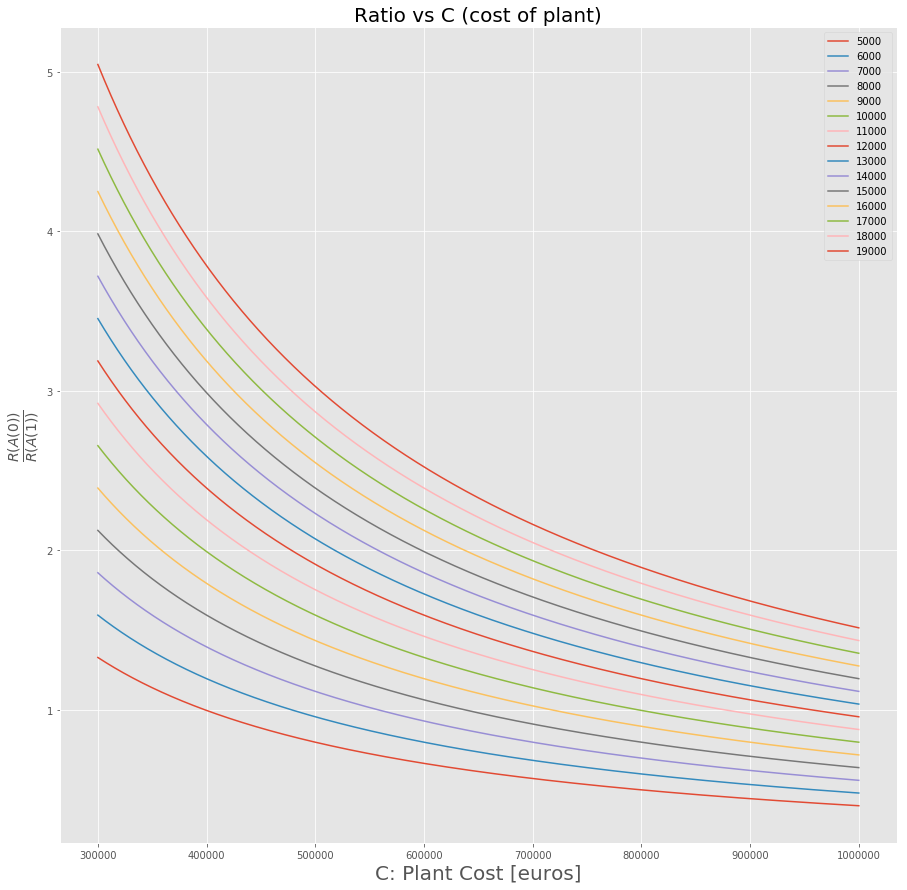

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
for fine in np.arange(5000,20000,1000):
    r = risk(r=2, b=fine)
    ra0 = r[0]
    cs = np.linspace(300000,1000000,num=2000)
    ratios = np.zeros(cs.shape[0])
    for i, c in enumerate(cs):
        ratio = ra0/(c/10)
        ratios[i] = ratio
    plt.plot(cs, ratios, label=str(fine))
plt.legend()
plt.xlabel('C: Plant Cost [euros]', fontsize=20)
plt.ylabel(r'$\frac{R(A(0))}{R(A(1))}$', fontsize=20)
plt.title(r'Ratio vs C (cost of plant)', fontsize=20);